### 1. Importing and Loading Required Libraries

#### 1.1. Installing and Loading Required Packages
This section installs and loads the essential R packages for data analysis and visualization. The `ggcorrplot` package creates correlation plots, `car` offers regression diagnostics, and `HH` provides additional statistical methods. The `tidyverse` is used for data manipulation, `ggplot2` for visualization, and both `gridExtra` and `cowplot` help arrange multiple plots.

In [ ]:
install.packages("ggcorrplot")
install.packages("car")
install.packages("HH")
# Load necessary libraries
library(tidyverse)
library(ggplot2)
library(gridExtra)
library(cowplot)
library(ggcorrplot)
library(car)
library(HH)

### 2. Data Preparation and Transformation

#### 2.1. Reading the Data
Reading the data from the CSV file and displaying the first few rows to understand the structure of the data.

In [32]:
data_rent <- read.csv("../../resources/clean-data/rent_2018_2023.csv", dec = ",", header = TRUE, sep = ";")

#### 2.2. Convert categorical variables to factors (dummy variables)
Converting categorical variables to factors to use them in the regression model.

In [33]:
data_rent$gym <- as.factor(data_rent$gym)
data_rent$field_quadra <- as.factor(data_rent$field_quadra)
data_rent$elevator <- as.factor(data_rent$elevator)
data_rent$furnished <- as.factor(data_rent$furnished)
data_rent$swimming_pool <- as.factor(data_rent$swimming_pool)

#### 2.3. Convert date to date format
Converting the date column to a date format to filter the data by year.

In [34]:
data_rent$date <- as.Date(data_rent$date, format = "%d/%m/%Y")

#### 2.4. Filter data by year
Filtering the data by year to create separate datasets for each year.

In [35]:
data_2018 <- filter(data_rent, year(date) == 2018)
data_2019 <- filter(data_rent, year(date) == 2019)
data_2020 <- filter(data_rent, year(date) == 2020)
data_2021 <- filter(data_rent, year(date) == 2021)
data_2022 <- filter(data_rent, year(date) == 2022)
data_2023 <- filter(data_rent, year(date) == 2023)

### 3. Model Specification and Fitting

#### 3.1. Defining the Model parameters
This subsection defines the formula for the regression model, specifying `price_m2` as the dependent variable and various property features as independent variables.

In [36]:
params <- (price_m2 ~ area_m2 +
  suite +
  bedrooms +
  bathrooms +
  garage +
  condo_real +
  metro_dist_km +
  delta_cbd_farialima +
  idh +
  gym +
  field_quadra +
  elevator +
  furnished +
  swimming_pool)

#### 3.2. Creating linear regression models for each year
Creating linear regression models for each year to compare the results. 

In [37]:
reg <- lm(params, data = data_rent)
reg_2018 <- lm(params, data = data_2018)
reg_2019 <- lm(params, data = data_2019)
reg_2020 <- lm(params, data = data_2020)
reg_2021 <- lm(params, data = data_2021)
reg_2022 <- lm(params, data = data_2022)
reg_2023 <- lm(params, data = data_2023)

#### 3.3. Defining a final variable
Setting the final variable to the regression model to be used in the analysis.

In [38]:
reg_final <- reg
data_rent_final <- data_rent
print(nrow(data_rent_final))

[1] 18135


#### 4. Checking the results for the linear regression model
Checking the results for the linear regression model to understand the relationship between the variables.

In [39]:
summary(reg_final)


Call:
lm(formula = params, data = data_rent)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.463 -12.737  -3.528   9.599 236.931 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          6.4917494  3.5113575   1.849 0.064516 .  
area_m2             -0.1687745  0.0087689 -19.247  < 2e-16 ***
suite                3.6811836  0.5078807   7.248 4.52e-13 ***
bedrooms            -7.4135981  0.4053318 -18.290  < 2e-16 ***
bathrooms            2.9722625  0.3908136   7.605 3.08e-14 ***
garage               6.3652549  0.3751403  16.968  < 2e-16 ***
condo_real          -0.0057173  0.0004628 -12.354  < 2e-16 ***
metro_dist_km       -0.1013616  0.1580033  -0.642 0.521201    
delta_cbd_farialima -1.3094241  0.0682164 -19.195  < 2e-16 ***
idh                 74.5853748  3.7797924  19.733  < 2e-16 ***
gym1                 8.0108468  1.0284609   7.789 7.37e-15 ***
field_quadra1       -3.2729294  0.9054033  -3.615 0.000302 ***
elevator1           -4.474

#### Removing outliers
It's important to remove outliers to improve the model's accuracy.

In [40]:
outliers <- outlierTest(reg_final, cutoff = 100, n.max = Inf)
# Get the row numbers of the outliers
outlier_rows <- as.numeric(names(outliers$rstudent))
print(length(outlier_rows))

[1] 202


#### Remove the outlier rows from the dataframe

In [41]:
data_rent_wo_outliers <- data_rent_final[-outlier_rows,]
# Check the number of rows in the original and new dataframes
print(nrow(data_rent_final))
print(nrow(data_rent_wo_outliers))
# Re-run the regression model without outliers
reg_wo_outliers <- lm(params, data = data_rent_wo_outliers)
summary(reg_wo_outliers)

[1] 18135
[1] 17933



Call:
lm(formula = params, data = data_rent_wo_outliers)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.238 -11.643  -2.670   9.745  54.174 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         10.7509262  2.9212472   3.680 0.000234 ***
area_m2             -0.1703425  0.0074044 -23.006  < 2e-16 ***
suite                4.1188979  0.4249996   9.692  < 2e-16 ***
bedrooms            -6.6092412  0.3381414 -19.546  < 2e-16 ***
bathrooms            2.6161074  0.3280832   7.974 1.70e-15 ***
garage               6.6819362  0.3135600  21.310  < 2e-16 ***
condo_real          -0.0063177  0.0003942 -16.026  < 2e-16 ***
metro_dist_km       -0.3867266  0.1317006  -2.936 0.003328 ** 
delta_cbd_farialima -1.1705687  0.0567454 -20.628  < 2e-16 ***
idh                 66.1491642  3.1476687  21.015  < 2e-16 ***
gym1                 8.0013896  0.8588801   9.316  < 2e-16 ***
field_quadra1       -3.7687993  0.7548116  -4.993 6.04e-07 ***
elevator1     

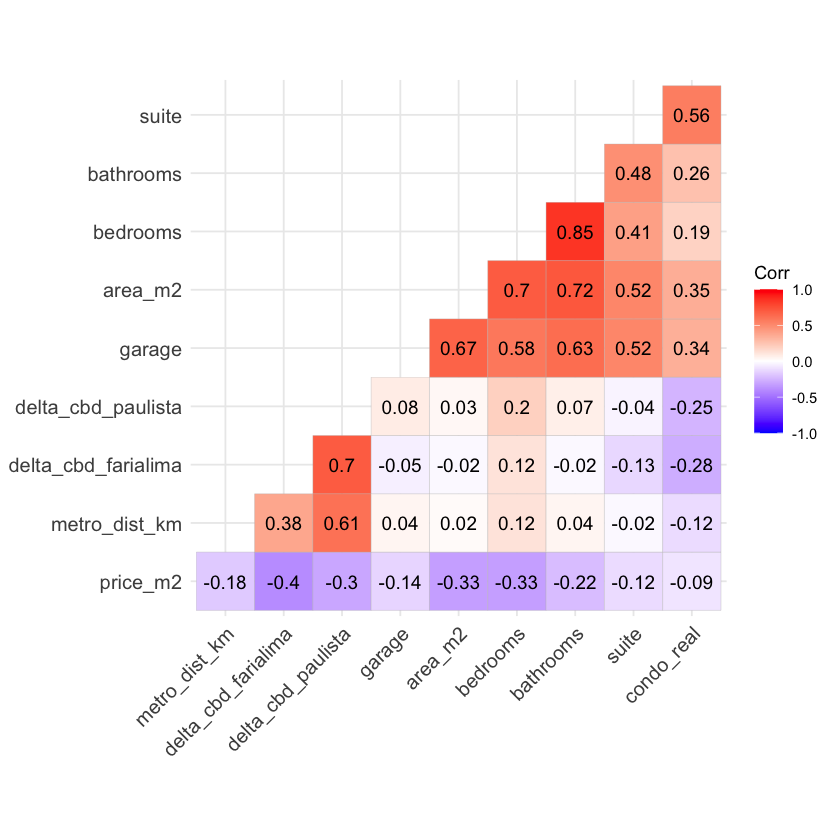

In [42]:
reduced_data <- data_rent_wo_outliers[, (names(data_rent_wo_outliers) %in% c("price_m2", "area_m2", "bedrooms", "bathrooms", "suite", "garage", "condo_real", "metro_dist_km", "delta_cbd_farialima", "delta_cbd_paulista"))]

# Compute correlation at 2 decimal places
corr_matrix <- round(cor(reduced_data), 2)
ggcorrplot(corr_matrix, hc.order = TRUE, type = "lower", lab = TRUE)

### Finding the best model
Creating a code to run the best model and generate the best combination of variables and transformations to generate the final regression model.

#### 1. Function to calculate the best model

In [43]:
calculate_best_model <- function(data, dependent_var, independent_vars, transformations) {
  best_r2 <- -Inf
  best_model <- NULL
  best_combination <- NULL
  list_r2 <- NULL

  # Gerar todas as combinações de transformações para todas as variáveis independentes
  trans_combinations <- expand.grid(rep(list(transformations), length(independent_vars)))
  colnames(trans_combinations) <- independent_vars

  for (trans_row in seq_len(nrow(trans_combinations))) {
    transformed_data <- data
    formula_parts <- c(dependent_var, "~")
    for (var in independent_vars) {
      trans <- trans_combinations[trans_row, var]
      transformed_var <- switch(as.character(trans),
                                "X" = data[[var]],
                                "1_X" = 1 / data[[var]],
                                "LnX" = log(data[[var]]),
                                "X__2" = data[[var]]^2,
                                "X__1_2" = sqrt(data[[var]]),
                                "1_X__2" = 1 / (data[[var]]^2),
                                "1_X__1_2" = 1 / sqrt(data[[var]]))
      trans_name <- paste(var, trans, sep = "_")
      transformed_data[[trans_name]] <- transformed_var
      formula_parts <- c(formula_parts, trans_name)
    }

    formula_string <- paste(paste(formula_parts, collapse = " + "), " + garage + condo_real + gym + field_quadra + elevator + furnished + swimming_pool")
    formula_string <- gsub(" \\+ ~ \\+ ", " ~ ", formula_string)  # Corrigir formatação da fórmula
    formula <- as.formula(formula_string)
    model <- lm(formula, data = transformed_data)

    r2 <- summary(model)$r.squared
    list_r2 <- append(list_r2, r2)

    if (r2 > best_r2) {
      best_r2 <- r2
      best_model <- model
      best_combination <- list(variables = independent_vars, transformations = as.list(trans_combinations[trans_row,]))
    }
  }
  return(list(best_model = best_model, best_combination = best_combination, best_r2 = best_r2, list_r2 = list_r2))
}

#### 2. Defining the variables to be used in the model

In [44]:
data_rent_wo_outliers$price_m2 <- log(data_rent_wo_outliers$price_m2)
dependent_var <- "price_m2"
independent_vars <- c("area_m2", "bedrooms", "metro_dist_km", "delta_cbd_farialima", "idh")
transformations <- c("X", "1_X", "LnX", "X__2", "X__1_2", "1_X__2", "1_X__1_2")

#### 3. Calculating the function to generate the best model 

In [45]:
results <- calculate_best_model(data_rent_wo_outliers, dependent_var, independent_vars, transformations)

#### 4. Printing the result

In [46]:
summary(results$best_model)


Call:
lm(formula = formula, data = transformed_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33167 -0.23383 -0.00429  0.23472  1.01640 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 6.077e+00  4.424e-02 137.365  < 2e-16 ***
area_m2_LnX                -3.766e-01  1.029e-02 -36.607  < 2e-16 ***
bedrooms_X__2              -1.406e-02  1.509e-03  -9.317  < 2e-16 ***
metro_dist_km_LnX          -4.179e-02  3.857e-03 -10.832  < 2e-16 ***
delta_cbd_farialima_X__1_2 -1.692e-01  5.888e-03 -28.738  < 2e-16 ***
idh_1_X__2                 -3.791e-01  1.813e-02 -20.906  < 2e-16 ***
garage                      1.843e-01  6.055e-03  30.439  < 2e-16 ***
condo_real                 -8.459e-05  6.772e-06 -12.491  < 2e-16 ***
gym1                        1.619e-01  1.688e-02   9.589  < 2e-16 ***
field_quadra1              -7.067e-03  1.487e-02  -0.475   0.6346    
elevator1                  -5.498e-02  1.200e-02  -4.581 

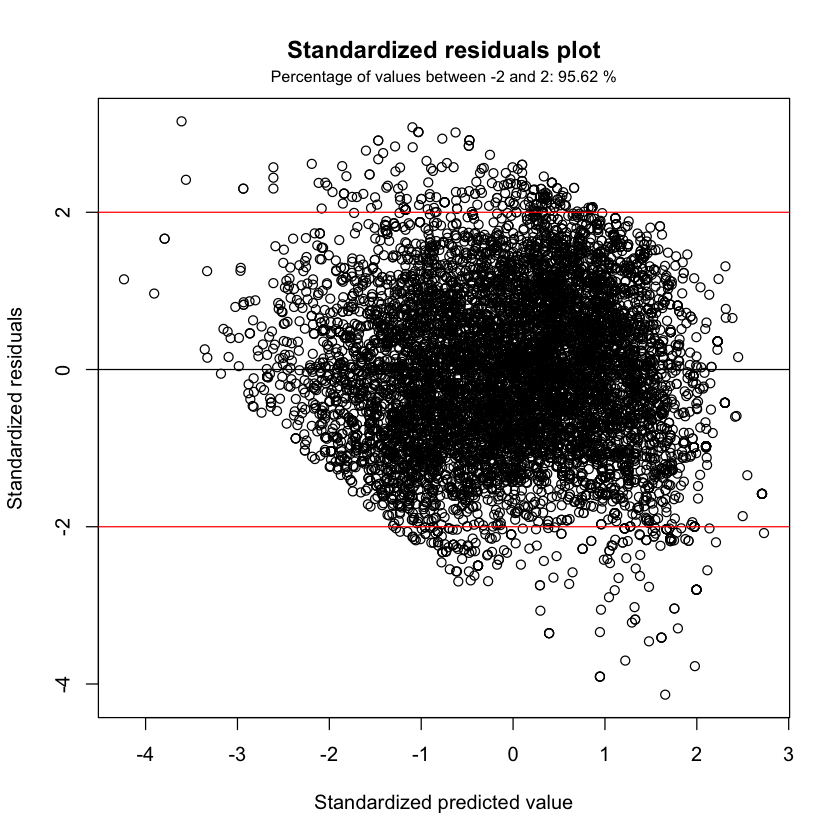

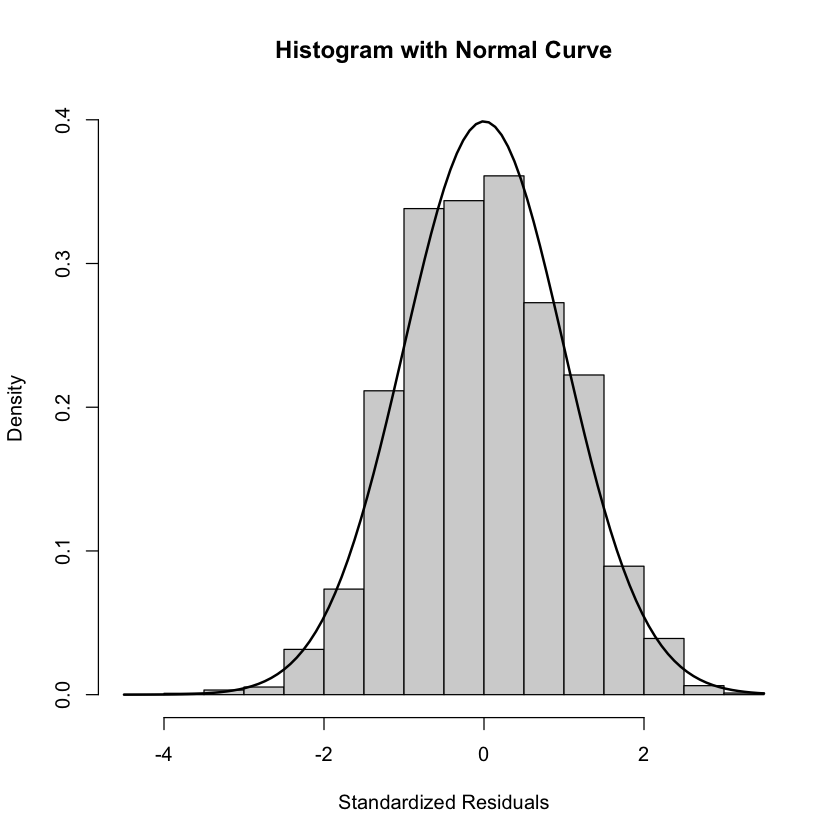

In [47]:
predicted<- predict(results$best_model)
residuals <- resid(results$best_model)
stand_predicted <- (predicted - mean(predicted)) / sd(predicted)
stand_residuals <- (residuals - mean(residuals)) / sd(residuals)

plot(stand_predicted, stand_residuals, main = "Standardized residuals plot", xlab = "Standardized predicted value", ylab = "Standardized residuals")
abline(0, 0)
abline(h = -2, col = "red")
abline(h = 2, col = "red")

# Calculate the total number of values within the interval [-2, 2]
within_interval <- sum(stand_residuals >= -2 & stand_residuals <= 2)
mtext(paste("Percentage of values between -2 and 2:", round(within_interval / length(stand_residuals) * 100, 2), "%"), side = 3, line = 0.5, cex = 0.8)

# Calculate the histogram data without plotting
hist_data <- hist(stand_residuals, plot = FALSE)

# Calculate the normal distribution density values
x_values <- seq(min(stand_residuals), max(stand_residuals), length = 100)
y_values <- dnorm(x_values, mean = mean(stand_residuals), sd = sd(stand_residuals))

# Determine the y-axis limit
y_max <- max(c(hist_data$density, y_values))

# Plot the histogram with the y-axis limit
hist(stand_residuals, freq = FALSE, ylim = c(0, y_max),
     main = "Histogram with Normal Curve", xlab = "Standardized Residuals")

# Add the normal distribution curve
curve(dnorm(x, mean = mean(stand_residuals), sd = sd(stand_residuals)), add = TRUE, lwd = 2)